https://www.youtube.com/watch?v=XrykiaS_eOs


https://www.tensorflow.org/tutorials/generative/autoencoder#:~:text=An%20autoencoder%20is%20a%20special,representation%20back%20to%20an%20image.

# **Auto Encoders**

**1. Unsupervised Learning**

**2. Compression**

**3. Used for Compression Denoising and Anomly Detection**




---



---



---


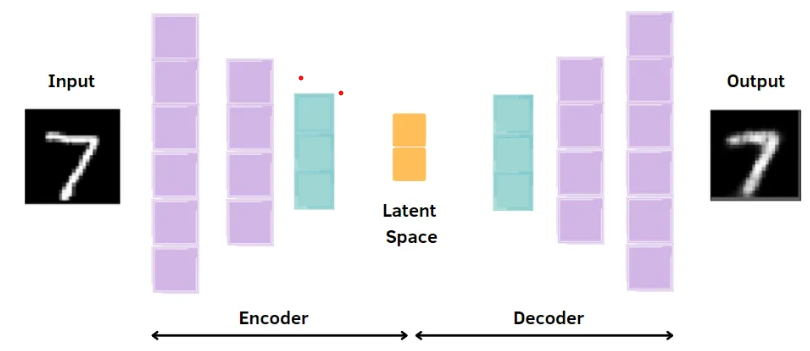



---
---
---


**Autoencoder**

The autoencoder is an unsupervised deep learning algorithm that learns encoded representations of the input data and then reconstructs the same input as output. It consists of two networks, Encoder and Decoder. The Encoder compresses the high-dimensional input into a low-dimensional latent code, called also latent code or encoded space, to extract the most relevant information from it, while the Decoder decompresses the encoded data and recreates the original input.

In [2]:
!pip install tensorflow

In [4]:
!pip install keras

#**Import necessary libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model


#**Load Dataset**

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)



(60000, 28, 28)
(10000, 28, 28)


#**Visualize the image**

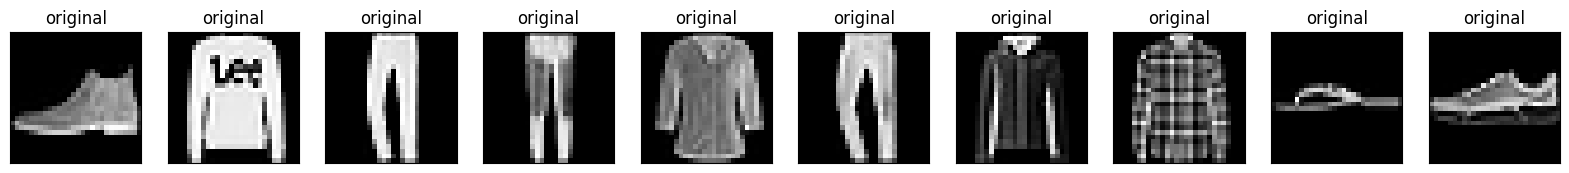

In [3]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  #display original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# **Autoencoder Part**

In [16]:
import tensorflow as tf
from tensorflow.keras import layers

latent_dim = 64  # Set the size of the latent space

class Autoencoder(tf.keras.Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(28, 28, 1)),
            layers.Conv2D(32, 3, activation='relu', strides=2, padding='same'),  # Downsample to (14, 14, 32)
            layers.Conv2D(64, 3, activation='relu', strides=2, padding='same'),  # Downsample to (7, 7, 64)
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu')
        ])
        
        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(latent_dim,)),
            layers.Dense(7 * 7 * 64, activation='relu'),
            layers.Reshape((7, 7, 64)),
            layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same'),  # Upsample to (14, 14, 64)
            layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same'),  # Upsample to (28, 28, 32)
            layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')  # Output (28, 28, 1)
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate and compile the model
autoencoder = Autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

# Model summary
autoencoder.encoder.summary()
autoencoder.decoder.summary()


C:\Users\Manas\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       200,768 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,584 (857.75 KB)

 Trainable params: 219,584 (857.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
x_train = x_train.reshape(-1, 28, 28, 1)  # Add the channel dimension
x_test = x_test.reshape(-1, 28, 28, 1)


# **Define Autoencoder Class**

In [18]:
autoencoder.compile(optimizer='adam', loss='mse')


In [19]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - loss: 0.0320 - val_loss: 0.0105
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - loss: 0.0094 - val_loss: 0.0079
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 5/10
1745/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0064

KeyboardInterrupt: 

In [20]:
from tensorflow.keras import layers, models

class Autoencoder(models.Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Define the encoder
        self.encoder = models.Sequential([
            layers.InputLayer(input_shape=(28, 28, 1)),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Flatten(),
            layers.Dense(64, activation='relu')
        ])
        
        # Define the decoder
        self.decoder = models.Sequential([
            layers.InputLayer(input_shape=(64,)),
            layers.Dense(7 * 7 * 64, activation='relu'),
            layers.Reshape((7, 7, 64)),
            layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, inputs):
        x = self.encoder(inputs)
        return self.decoder(x)


In [21]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Ensure data is in the correct shape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Train the model
autoencoder.fit(x_train, x_train,
                 epochs=10,
                 shuffle=True,
                 validation_data=(x_test, x_test))


Epoch 1/10
 557/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - loss: 0.0066

KeyboardInterrupt: 

In [22]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

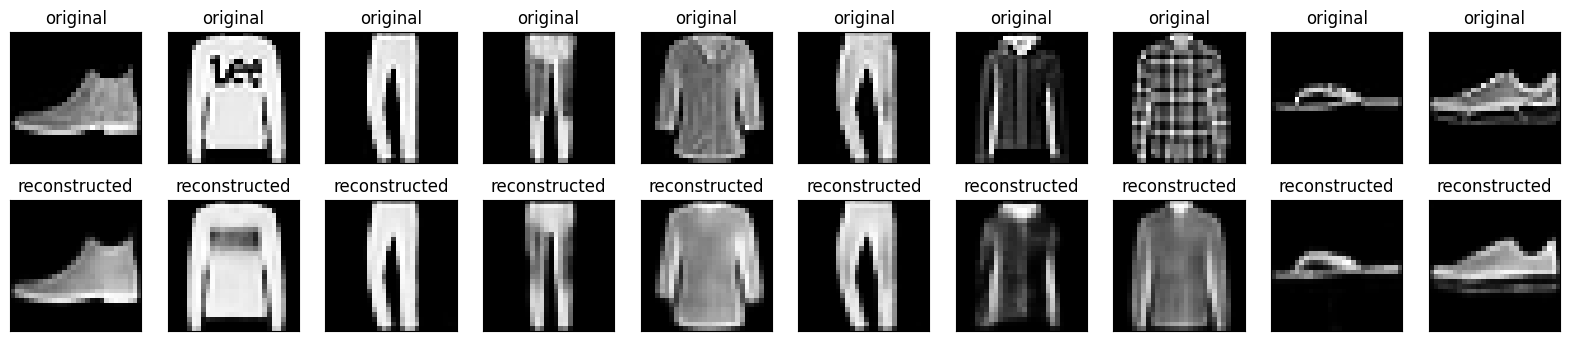

In [23]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()